In [ ]:
import numpy as np


In [ ]:
!pip install scikit_learn

In [ ]:
from sklearn.datasets import load_diabetes
import pandas as pd
from sklearn.model_selection import train_test_split

In [ ]:
ds=load_diabetes()
X=ds.data
y=ds.target
import pandas as pd
from sklearn.datasets import load_diabetes

# Load the diabetes dataset
ds = load_diabetes()
X = ds.data
y = ds.target

# Convert the data to a DataFrame
df = pd.DataFrame(X, columns=ds.feature_names)
df['target'] = y

# Display the first few rows of the DataFrame
print(df.head())



        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  


In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2,random_state=40)
a=xtrain
len(xtrain[:])
# # a=[1,2,3,4]
# # a[:2]
a[:,:5].shape[1]
ytrain.shape
len(xtrain)
df = pd.DataFrame(xtest, columns=ds.feature_names)
df['target'] = ytest
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.056239,0.050680,-0.030996,0.008101,0.019070,0.021233,0.033914,-0.039493,-0.029526,-0.059067,91.0
1,0.019913,0.050680,-0.012673,0.070072,-0.011201,0.007141,-0.039719,0.034309,0.005386,0.003064,91.0
2,-0.041840,-0.044642,0.041218,-0.026328,-0.031840,-0.030437,-0.036038,0.002943,0.033654,-0.017646,52.0
3,-0.070900,-0.044642,0.039062,-0.033213,-0.012577,-0.034508,-0.024993,-0.002592,0.067737,-0.013504,310.0
4,0.012648,0.050680,0.000261,-0.011420,0.039710,0.057245,-0.039719,0.056081,0.024055,0.032059,259.0


In [ ]:
w=np.ones(shape=xtrain[:,:5].shape[1])
w2=np.ones(shape=xtrain[:,5:].shape[1])
b=0
n=353
lr=0.01
# out=np.dot(w,xtrain.T)+b
#  w_d=(1/n)*(np.transpose(xtrain[:,:5])np.mean(np.abs(ytrain-out)))
# b_d=np.mean(ytrain-out)
# w_d
# b_d
out=np.dot(w,xtrain[:,:5].T)+np.dot(w2,xtrain[:,5:].T)+b
print('shape:',out.shape)
print(1/n*np.mean(np.abs(ytrain-out)))
w_d=(1/n)*(np.mean(np.abs(ytrain-out)))

shape: (353,)
0.4271345606421233


In [ ]:
def normalize(X):
    min_val = np.min(X, axis=0)
    max_val = np.max(X, axis=0)
    X_norm = (X - min_val) / (max_val - min_val)
    return X_norm
xtrain=normalize(xtrain)
ytrain=normalize(ytrain)
xtest=normalize(xtest)
ytest=normalize(ytest)
df = pd.DataFrame(xtest, columns=ds.feature_names)
df['target'] = ytest
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.750000,1.0,0.210970,0.428571,0.540698,0.563144,0.563636,0.166667,0.302005,0.115385,0.166667
1,0.583333,1.0,0.282700,0.714286,0.412791,0.505155,0.200000,0.500000,0.465701,0.403846,0.166667
2,0.300000,0.0,0.493671,0.269841,0.325581,0.350515,0.218182,0.358333,0.598239,0.307692,0.039216
3,0.166667,0.0,0.485232,0.238095,0.406977,0.333763,0.272727,0.333333,0.758046,0.326923,0.882353
4,0.550000,1.0,0.333333,0.338571,0.627907,0.711340,0.200000,0.598333,0.553233,0.538462,0.715686


In [ ]:
def activation(out):
    return np.maximum(0, out)
def sigmoid(out):
    return 1/(1+np.exp(-out))
def mean_abs(out,pred):
    # print('shapees:--------------------------------->',out.shape,pred.shape)
    return np.mean(np.abs(out-pred))
# np.dot(w,xtrain.T).shape
def gradient_test(xtrain,ytrain,lr,epochs=100):
  #y=mx+c
  b=0
  # lr=0.02
  w=np.ones(shape=xtrain[:,:5].shape[1])
  w2=np.ones(shape=xtrain[:,5:].shape[1])
  n=len(xtrain)
  losses=[]
  predicted=[]
  epoches=[]
  for i in range(epochs):
    out=np.dot(w,xtrain[:,:5].T)+np.dot(w2,xtrain[:,5:].T)+b
    out=sigmoid(out)
    loss=(ytrain-out)
    # print('loss shape:',loss.shape)
    # print('loss:',mean_abs(ytrain,out))
    losses.append(mean_abs(ytrain,out))
    epoches.append(i)
    # print('shape:',out.shape)
    w_d=-(1/n)*(np.dot(np.transpose(xtrain[:,:5]),loss))
    w2_d=-(1/n)*(np.dot(np.transpose(xtrain[:,5:]),loss))
    b1_d=-np.mean(ytrain-out)

    w=w-lr*w_d
    w2=w2-lr*w2_d
    b=b-lr*b1_d
  print(f'w1:{w},\tw2:{w2},\tbias:{b},\t')

  return w,w2,b,losses,epoches
    # print(f'w1:{w},\tw2:{w2},\tbias:{b},\t')

#above method i do any unknow mistake so that make loss increases

In [ ]:
lr=0.1
w1,w2,b,ls,epo=gradient_test(xtrain,ytrain,lr,500)

ValueError: not enough values to unpack (expected 5, got 4)

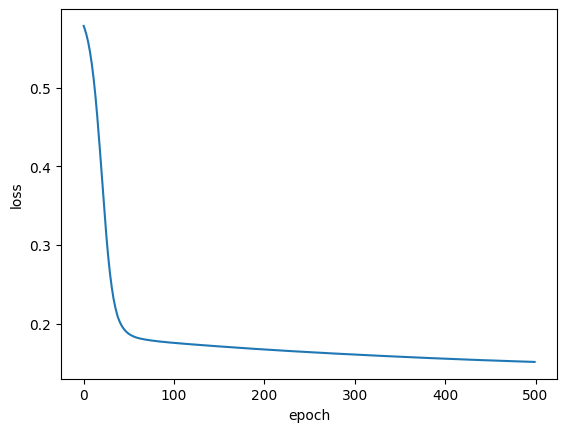

In [ ]:
import matplotlib.pyplot as plt
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(epo,ls)

In [ ]:
def pred(test,w1,w2,b):
  out=np.dot(w1,np.transpose(test[:,:5]))+np.dot(w2,np.transpose(test[:,5:]))+b
  print(sigmoid(out[0]))
  return sigmoid(out)
out=pred(xtest,w1,w2,b)
# xtest[0].shape
# w[0].shape
print(ytest[0])
accuracy=np.mean(ytest==out)
print('model accuracy:',accuracy)

ValueError: shapes (10,) and (5,89) not aligned: 10 (dim 0) != 5 (dim 0)

In [ ]:
def activation(out):
    return np.maximum(0, out)
def sigmoid(out):
    return 1/(1+np.exp(-out))
def mean_abs(out,pred):
    # print('shapees:--------------------------------->',out.shape,pred.shape)
    return np.mean(np.abs(out-pred))
# np.dot(w,xtrain.T).shape
def gradient_test(xtrain,ytrain,lr,epochs=100):
  #y=mx+c
  b=0
  # lr=0.02
  w=np.ones(shape=xtrain.shape[1])
  # w2=np.ones(shape=xtrain[:,5:].shape[1])
  n=len(xtrain)
  losses=[]
  predicted=[]
  epoches=[]
  for i in range(epochs):
    out=np.dot(w,xtrain.T)+b
    out=sigmoid(out)
    loss=(ytrain-out)
    # print('loss shape:',loss.shape)
    # print('loss:',mean_abs(ytrain,out))
    losses.append(mean_abs(ytrain,out))
    epoches.append(i)
    # print('shape:',out.shape)
    w_d=-(1/n)*(np.dot(xtrain.T,loss))
    # w2_d=-(1/n)*(np.dot(np.transpose(xtrain[:,5:]),loss))
    b1_d=-(1/n)*np.sum(loss)

    w=w-lr*w_d
    # w2=w2-lr*w2_d
    b=b-lr*b1_d
  # print(f'w1:{w},\tw2:{w2},\tbias:{b},\t')

  return w,b,losses,epoches
    # print(f'w1:{w},\tw2:{w2},\tbias:{b},\t')

#above method i do any unknow mistake so that make loss increases

In [ ]:
lr=0.001
w1,b,ls,epo=gradient_test(xtrain,ytrain,lr,100)


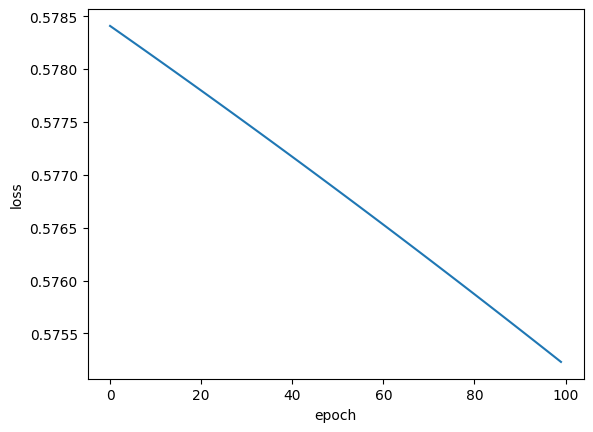

In [ ]:
import matplotlib.pyplot as plt
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(epo,ls)

In [ ]:
def pred(test,w1,b):
  out=np.dot(w1,np.transpose(test))+b
  print('model out:',sigmoid(out[0]))
  return sigmoid(out)
out=pred(xtest,w1,b)
# xtest[0].shape
# w[0].shape
print('actual out',ytest[0])
accuracy=np.mean(out==ytest)
print('model accuracy:',accuracy)

model out: 0.9999996920781364
actual out 91.0
model accuracy: 0.0


In [ ]:
def r(x):
  return np.where(x > 1, 1, 0)


r(1)

array(0)

In [ ]:
# ytest[0]

91.0